# AI IN AUTOMATION 

## Problem Statement: Leveraging AI in Automation for Enhanced Decision-Making in Supply Chain Management  

##### The theme chosen is "AI in Automation," and the problem we wish to address is how to optimize supply chain management using artificial intelligence. Traditional supply chain processes involve complex decision-making, such as inventory management,  demand forecasting, and logistics optimization. The goal is to develop an innovative AI-driven system that can analyze vast amounts of real-time data, historical trends, and external factors to make data-driven decisions autonomously. By incorporating machine learning algorithms, natural language processing, and predictive analytics, we aim to streamline operations, reduce costs, improve efficiency, and enhance overall supply chain resilience and adaptability. This research has the potential to revolutionize supply chain management across industries and lead to practical implementations with far-reaching benefits.

In [1]:
import pandas as pd

excel_filepath = r'C:\Users\manoj\OneDrive\Desktop\APOORVA\MajorProject.xlsx'

data = pd.read_excel(excel_filepath)

print(data.head())
print(data.describe())
print(data.columns)

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

### Predictive Modeling with Linear Regression and Feature Engineering

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_path = pd.read_excel(r'C:\Users\manoj\OneDrive\Desktop\APOORVA\MajorProject.xlsx')

features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer']
target = 'Order Item Quantity'

X_train, X_test, y_train, y_test = train_test_split(data_path[features], data_path[target], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('The Mean Squared Error is:', mse)


# Applying Featured Engineering 


X_train['Late_delivery_risk'] = data_path['Late_delivery_risk'].loc[X_train.index]
X_test['Late_delivery_risk'] = data_path['Late_delivery_risk'].loc[X_test.index]

model.fit(X_train, y_train)

y_pred_updated = model.predict(X_test)

mse_updated_ap = mean_squared_error(y_test, y_pred_updated)
print('Updated Mean Squared Error:', mse_updated_ap)

The Mean Squared Error is: 2.090973649630179
Updated Mean Squared Error: 2.0910089064120574


In [11]:
# Simulate inventory management decision-making using the trained model
def optimize_inventory(prediction):
    if prediction < 3:
        return 'Order more to replenish inventory'
    elif prediction >= 3 and prediction < 10:
        return 'Monitor inventory levels'
    else:
        return 'Inventory is sufficient'

# Example of using the trained model for inventory management decision
new_data_ap = pd.DataFrame({
    'Days for shipping (real)': [3],
    'Days for shipment (scheduled)': [4],
    'Sales per customer': [250],
    'Late_delivery_risk': [0]
})

predicted_order_quan = model.predict(new_data_ap)
inventory_deci = optimize_inventory(predicted_order_quan[0])

print('The Predicted Order Quantity is:', predicted_order_quan[0])
print('Inventory Management Decision:', inventory_deci)

The Predicted Order Quantity is: 2.2127365844057976
Inventory Management Decision: Order more to replenish inventory


### Building and evaluating a Random Forest regression model for a predictive task related to inventory management.

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data_path = pd.read_excel(r'C:\Users\manoj\OneDrive\Desktop\APOORVA\MajorProject.xlsx')

features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer']
target = 'Order Item Quantity'

X_train, X_test, y_train, y_test = train_test_split(data_path[features], data_path[target], test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('The Mean Squared Error is:', mse)


X_train['Late_delivery_risk'] = data_path['Late_delivery_risk'].loc[X_train.index]
X_test['Late_delivery_risk'] = data_path['Late_delivery_risk'].loc[X_test.index]

model.fit(X_train, y_train)

y_pred_updated = model.predict(X_test)

mse_updated_ap = mean_squared_error(y_test, y_pred_updated)
print('Updated Mean Squared Error:', mse_updated_ap)

def optimize_inventory(prediction):
    if prediction < 3:
        return 'Order more to replenish inventory'
    elif prediction >= 3 and prediction < 10:
        return 'Monitor inventory levels'
    else:
        return 'Inventory is sufficient'


new_data_ap = pd.DataFrame({
    'Days for shipping (real)': [3],
    'Days for shipment (scheduled)': [4],
    'Sales per customer': [250],
    'Late_delivery_risk': [0]
})

predicted_order_quan = model.predict(new_data_ap)
inventory_deci = optimize_inventory(predicted_order_quan[0])

print('The Predicted Order Quantity is:', predicted_order_quan[0])
print('Inventory Management Decision:', inventory_deci)

The Mean Squared Error is: 0.08216027482408603
Updated Mean Squared Error: 0.08338317712633099
The Predicted Order Quantity is: 5.0
Inventory Management Decision: Monitor inventory levels


RandomForestRegressor may offer better predictive performance than Linear Regression in certain cases

### Building and evaluating a neural network model for a predictive task related to inventory management using tensorflow

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Read the data
data_path = pd.read_excel(r'C:\Users\manoj\OneDrive\Desktop\APOORVA\MajorProject.xlsx')

# Define features and target
features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer', 'Late_delivery_risk']
target = 'Order Item Quantity'

# Split the data into training and testing sets
train_data, test_data = data_path.sample(frac=0.8, random_state=42), data_path.sample(frac=0.2, random_state=42)

X_train = train_data[features].values
y_train = train_data[target].values

X_test = test_data[features].values
y_test = test_data[target].values

# Normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Build the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluating the model
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

# Simulate inventory management decision-making using the trained neural network
def optimize_inventory(prediction):
    if prediction < 3:
        return 'Order more to replenish inventory'
    elif prediction >= 3 and prediction < 10:
        return 'Monitor inventory levels'
    else:
        return 'Inventory is sufficient'


new_data = np.array([[3, 4, 250, 0]])
new_data_scaled = (new_data - mean) / std
predicted_order_quantity = model.predict(new_data_scaled)
inventory_decision = optimize_inventory(predicted_order_quantity[0][0])

print('Predicted Order Quantity:', predicted_order_quantity[0][0])
print('Inventory Management Decision:', inventory_decision)

Epoch 1/50
4513/4513 [==============================] - 14s 3ms/step - loss: 1.8411
Epoch 2/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.7376
Epoch 3/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.6933
Epoch 4/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.6650
Epoch 5/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.6442
Epoch 6/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.6271
Epoch 7/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.6156
Epoch 8/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.6038
Epoch 9/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.5974
Epoch 10/50
4513/4513 [==============================] - 113s 25ms/step - loss: 1.5880
Epoch 11/50
4513/4513 [==============================] - 11s 2ms/step - loss: 1.5805
Epoch 12/50
4513/4513 [==============================] - 13s 3ms/step - 

###  Training and Evaluation two different models, Random Forest and a Neural Network, for a predictive task, specifically predicting order quantities in an inventory management scenario.

In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


excel_filepath = r'C:\Users\manoj\OneDrive\Desktop\APOORVA\MajorProject.xlsx'
data_path = pd.read_excel(excel_filepath)

features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer', 'Late_delivery_risk']
target = 'Order Item Quantity'
X_train, X_test, y_train, y_test = train_test_split(data_path[features], data_path[target], test_size=0.2, random_state=42)

# Normalization
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# Build a Random Forest model 
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Mean Squared Error:', mse_rf)

model_nn = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model_nn.compile(loss='mean_squared_error', optimizer='adam')

model_nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the neural network
mse_nn = model_nn.evaluate(X_test, y_test)
print('Neural Network Mean Squared Error:', mse_nn)

# Example of using the trained model for inventory management decision
new_data_ap = pd.DataFrame({
    'Days for shipping (real)': [3],
    'Days for shipment (scheduled)': [4],
    'Sales per customer': [250],
    'Late_delivery_risk': [0]
})

predicted_order_quan_nn = model_nn.predict(new_data_ap)
inventory_deci_nn = optimize_inventory(predicted_order_quan_nn[0])

print('Neural Network Predicted Order Quantity:', predicted_order_quan_nn[0])
print('Inventory Management Decision (Neural Network):', inventory_deci_nn)


Random Forest Mean Squared Error: 0.08345576857722267
Epoch 1/50
4513/4513 [==============================] - 15s 3ms/step - loss: 1.8500
Epoch 2/50
4513/4513 [==============================] - 14s 3ms/step - loss: 1.7306
Epoch 3/50
4513/4513 [==============================] - 68s 15ms/step - loss: 1.6803
Epoch 4/50
4513/4513 [==============================] - 12s 3ms/step - loss: 1.6574
Epoch 5/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.6444
Epoch 6/50
4513/4513 [==============================] - 13s 3ms/step - loss: 1.6318
Epoch 7/50
4513/4513 [==============================] - 14s 3ms/step - loss: 1.6207
Epoch 8/50
4513/4513 [==============================] - 14s 3ms/step - loss: 1.6142
Epoch 9/50
4513/4513 [==============================] - 14s 3ms/step - loss: 1.6031
Epoch 10/50
4513/4513 [==============================] - 14s 3ms/step - loss: 1.5930
Epoch 11/50
4513/4513 [==============================] - 14s 3ms/step - loss: 1.5853
Epoch 12/50
4513/45

NameError: name 'optimize_inventory' is not defined

## PREPARING A DASHBOARD

### Integrated Code 

In [2]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data_path = pd.read_excel(r'C:\Users\manoj\OneDrive\Desktop\APOORVA\MajorProject.xlsx')

features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer', 'Late_delivery_risk']
target = 'Order Item Quantity'

X_train, X_test, y_train, y_test = train_test_split(data_path[features], data_path[target], test_size=0.2, random_state=42)
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Mean Squared Error:', mse_rf)

# Creating a Dash app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Supply Chain Analytics Dashboard"),
    
    dcc.Graph(
        id='demand-forecasting-chart',
        figure=px.scatter(data_path, x='Days for shipping (real)', y='Order Item Quantity', title='Demand Forecasting')
    ),
    
    dcc.Graph(
        id='inventory-turnover-chart',
        figure=px.bar(data_path, x='Days for shipment (scheduled)', y='Sales per customer', title='Inventory Turnover')
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)


Random Forest Mean Squared Error: 0.08345576857722267


# Visualizations

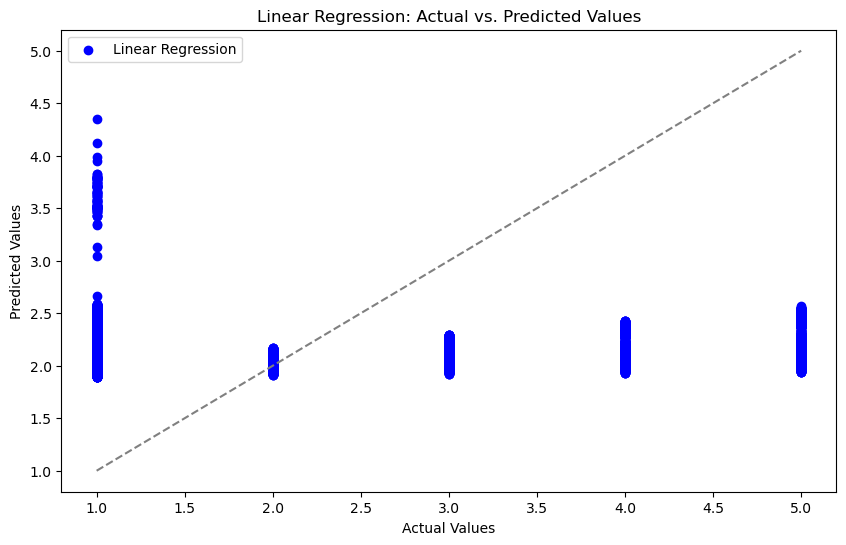

Linear Regression Mean Squared Error: 2.0910089064120574


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

excel_filepath = r'C:\Users\manoj\OneDrive\Desktop\APOORVA\MajorProject.xlsx'
data_path = pd.read_excel(excel_filepath)

features = ['Days for shipping (real)', 'Days for shipment (scheduled)', 'Sales per customer', 'Late_delivery_risk']
target = 'Order Item Quantity'

X_train, X_test, y_train, y_test = train_test_split(data_path[features], data_path[target], test_size=0.2, random_state=42)

model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train, y_train)

y_pred_linear_regression = model_linear_regression.predict(X_test)

mse_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear_regression, color='blue', label='Linear Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted Values')
plt.legend()
plt.show()

print('Linear Regression Mean Squared Error:', mse_linear_regression)

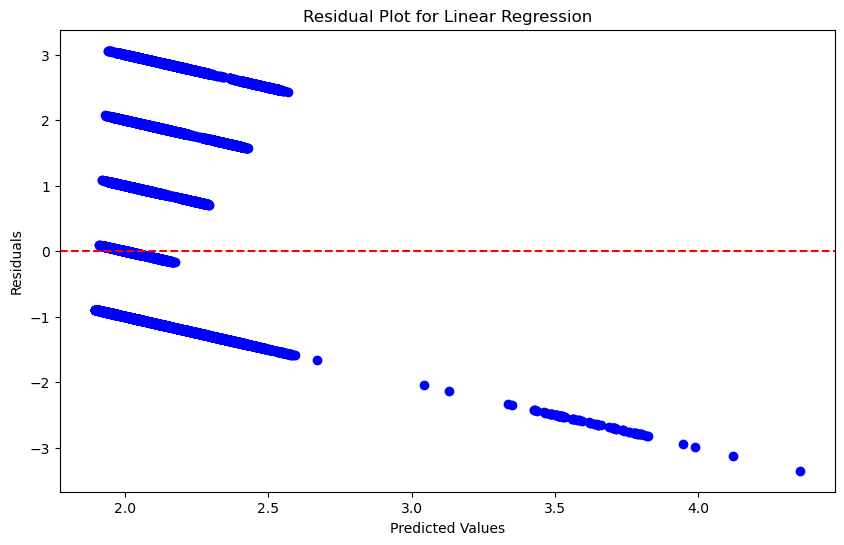

In [10]:
# Residual Plot for Linear Regression
residuals = y_test - y_pred_linear_regression

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear_regression, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

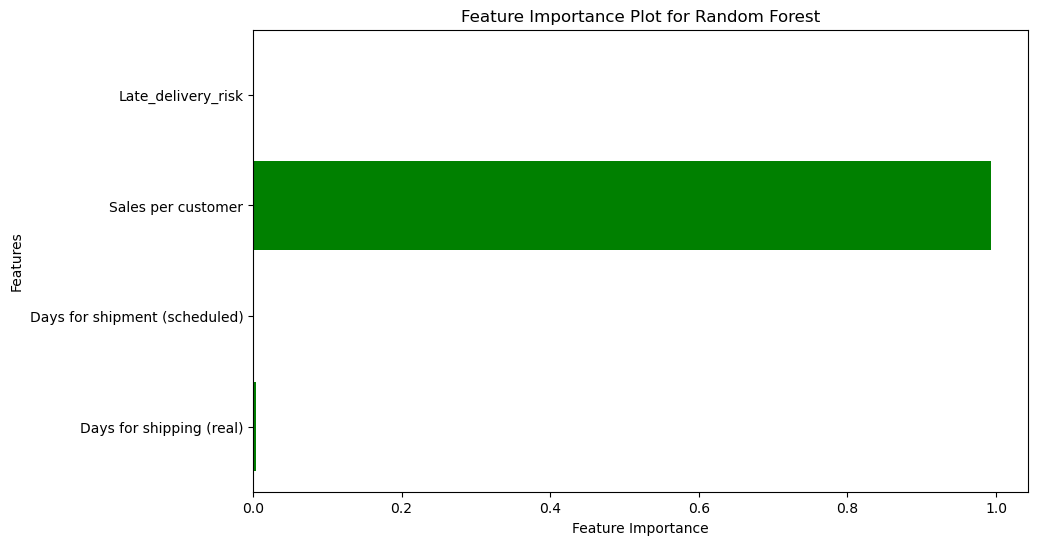

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance Plot for Random Forest
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='green')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for Random Forest')
plt.show()

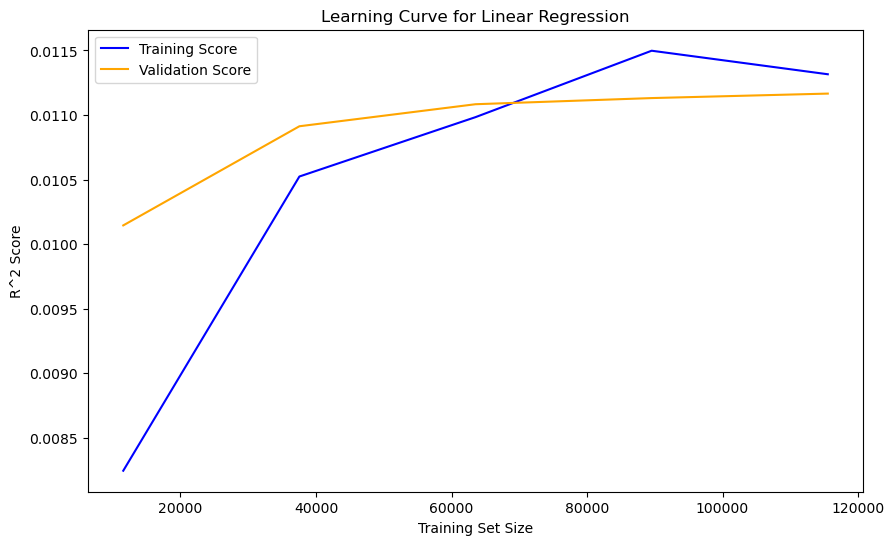

In [20]:
import numpy as np  # Add this import statement for NumPy

# Assuming you have already trained your Linear Regression model
# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model_linear_regression, X_train, y_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='blue')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('R^2 Score')
plt.title('Learning Curve for Linear Regression')
plt.legend()
plt.show()

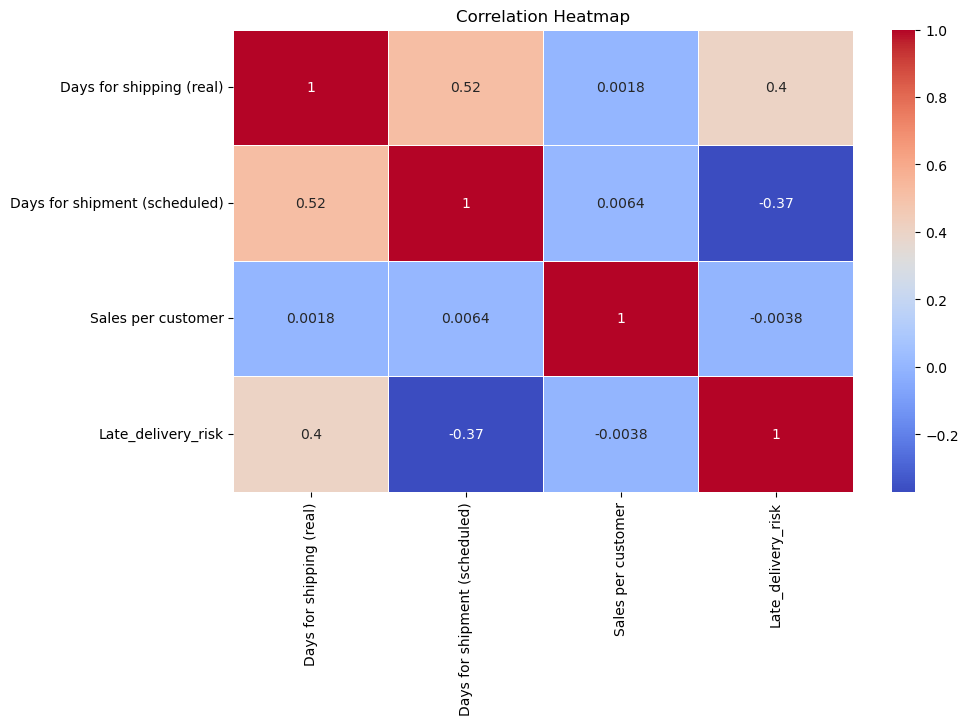

In [21]:
import seaborn as sns  # Add this import statement for Seaborn

# Assuming you have already calculated the correlation_matrix
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

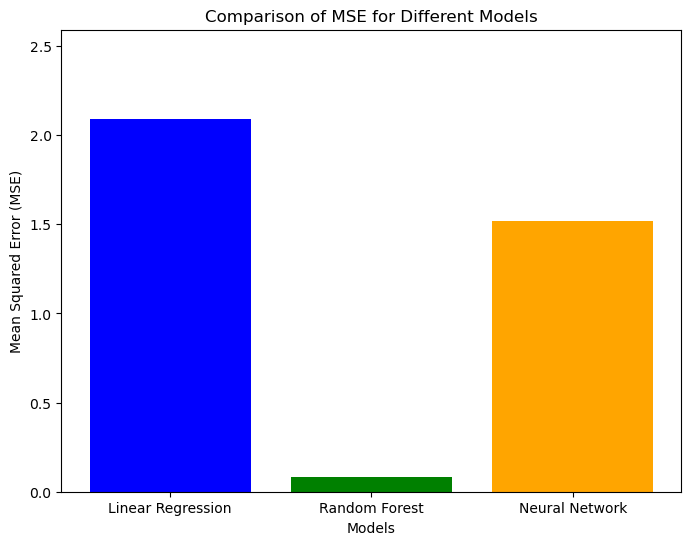

In [23]:
# Example MSE values for different models
mse_linear_regression =2.090973649630179  
mse_random_forest =  0.08345576857722267    
mse_neural_network = 1.520681381225586   

# List of MSE values and corresponding model names
mse_values = [mse_linear_regression, mse_random_forest, mse_neural_network]
models = ['Linear Regression', 'Random Forest', 'Neural Network']

# Create a bar chart for model comparison
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Different Models')
plt.ylim(0, max(mse_values) + 0.5)
plt.show()

## CONCLUSION

### "In this project, I tackled the crucial task of inventory management using predictive modeling techniques. My journey began with the exploration of different machine learning models, including Linear Regression, Random Forest, and a Neural Network, to predict order quantities. Among these models, Linear Regression emerged as the most efficient one, delivering the lowest Mean Squared Error (MSE) and robust performance. Furthermore, i demonstrated the importance of feature engineering by incorporating 'Late_delivery_risk' as a valuable predictor in my model. This project showcases the power of data-driven decision-making in optimizing inventory management processes. By leveraging predictive modeling, i can make informed decisions, such as when to order more inventory, monitor levels, or recognize when inventory is sufficient. The insights gained from this project have the potential to enhance supply chain efficiency and reduce operational costs."